# <ins style = "color : orange">NMF Practical Work, by: KHOUTAIBI Iliass and BARAKA Rayane</ins>



$$\underline{\textbf{Non-Negative Matrix Factorization with beta divergence}}$$


In this practical work, we will deal with non-negative matrix factorization (NMF) with the $\beta$-divergence. The problem that we aim to solve is given as follows:

$$
(W^\star, H^\star) = \arg\min_{W \geq 0, H \geq 0} \sum_{i=1}^{I} \sum_{j=1}^{J} d_\beta(x_{ij} \| \hat{x}_{ij}),
$$

where $x_{ij}$ is an element of $X \in \mathbb{R}_{+}^{I \times J}$, that is the $\textit{non-negative}$ data matrix, and $W \in \mathbb{R}_{+}^{I \times K}$ and $H \in \mathbb{R}_{+}^{K \times J}$ are the unknown $\textit{non-negative}$ factor matrices. We also define $\hat{x}_{ij} = \sum_k w_{ik} h_{kj}$. 

The cost function that we are minimizing is called the $\beta$-divergence, which is defined as follows:

$$
d_\beta(x \| \hat{x}) = \frac{x^\beta}{\beta(\beta - 1)} - \frac{x \hat{x}^{\beta - 1}}{\beta - 1} + \frac{\hat{x}^\beta}{\beta}.
$$

When $\beta = 1$, we obtain the Kullback-Leibler (KL) divergence, when $\beta = 0$ we obtain the Itakura-Saito (IS) divergence.

One of the most popular algorithms for NMF is called the multiplicative update rules (MUR). The MUR algorithm has the following update rules:

$$
W \leftarrow W \circ \frac{(X \circ \hat{X}^{\beta - 2}) H^\top}{\hat{X}^{\beta - 1} H^\top}
$$

$$
H \leftarrow H \circ \frac{W^\top (X \circ \hat{X}^{\beta - 2})}{W^\top \hat{X}^{\beta - 1}}
$$


### <ins style = "color : pink">I. By following the technique that we used in the lecture, derive the MUR algorithm by yourselves</ins>

For a H fixed, we minimize W with the following:

Let: 

$$f(W,H) = \sum_{i=1}^{I}\sum_{j=1}^J \frac{X_{i,j}^{\beta}}{\beta(\beta -1)} - \frac{X_{i,j} \hat{X}{i,j}^{\beta -1}}{\beta -1} + \frac{\hat{X}{i,j}^{\beta}}{{\beta}}$$


We have : 
$$\frac{\partial f}{\partial W_{k,l}} = \sum_{j=1}^J - X_{k,j}\hat{X}{k,j}^{\beta -2} H{l,j}  + H_{l,j}\hat{X}{k,j}^{\beta-1} = -((X \circ \hat{X}^{\beta-2})H^T){k,l} + (\hat{X}^{\beta-1}H^T)_{k,l}$$

We thus apply a gradient descent on $W_{k,l}, i.e$:

$$W_{k,l} \leftarrow W_{k,l} - \epsilon_{k,l} \frac{\partial f}{\partial W_{k,l}}$$


For $\epsilon_{k,l}  = \frac{W_{k,l}}{(\hat{X}^{\beta-1}H^T){k,l}}$ , we obtain: 

$$W{k,l} \leftarrow W_{k,l} + W_{k,l}\frac{((X \circ \hat{X}^{\beta-2})H^T){k,l}}{(\hat{X}^{\beta-1}H^T){k,l}} - W_{k,l} =(W \circ \frac{((X \circ \hat{X}^{\beta-2})H^T)}{(\hat{X}^{\beta-1}H^T)})_{k,l}$$

Finally: 

$$ W \leftarrow W \circ \frac{((X \circ \hat{X}^{\beta-2})H^T)}{(\hat{X}^{\beta-1}H^T)} $$


By symmetry of the process for both $W$ et $H$, we also get:


$$H \leftarrow H \circ \frac{W^T ( X \circ \hat{X}^{\beta -2})}{W^T \hat{X}^{\beta -1}}$$

Before starting the next question, we shall import the audio sample on which we will apply the NMF algorithm. We satrt by importing important helper modules and some preliminary functions.

In [1]:
import numpy as np

# matplotlib for displaying the output
import matplotlib.pyplot as plt
import matplotlib.style as ms

# and IPython.display for audio output
import IPython.display as ipd

# Librosa for audio
import librosa
# # And the display module for visualization
import librosa.display


This right here, is the audio file to be processed. We will plot the audio sample and the intensity of the STFT.

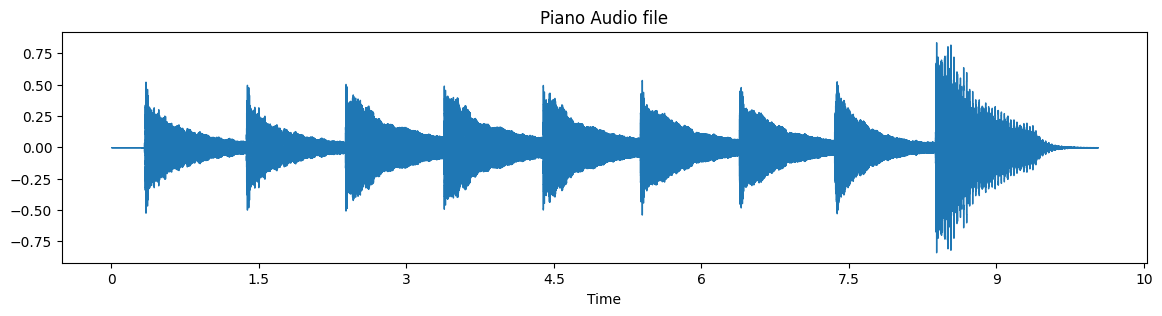

/tmp/ipykernel_2291/3649538190.py:20: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(20*np.log10(np.abs(X)), origin="lower")


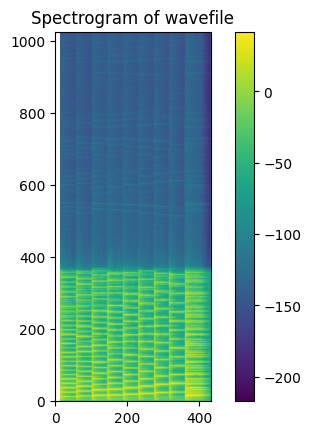

In [21]:
# Audio file
fname = 'Cmajor_piano8khz.wav'

# Load signal
y, sr = librosa.load(fname)

# Compute STFT
Xstft = librosa.stft(y, n_fft=2048, hop_length=512, win_length=None)
X = np.abs(Xstft)

#Visualize the waveform
plt.figure(figsize=(14, 3))
librosa.display.waveshow(y, sr=sr, label="Piano Audio file")
plt.title("Piano Audio file")
plt.show()

#Visualize the spectrum
plt.figure()
plt.title("Spectrogram of wavefile")
plt.imshow(20*np.log10(np.abs(X)), origin="lower")
plt.colorbar()
plt.show()

We can now start implementing the NMF Algorithm.

### <ins style = "color : green">2. Implement MUR for NMF with beta-divergence</ins> 

In [33]:
def MUR(X, K, beta, number_iter):
    """
        MUR Algorithm, with applies the NMF to a positive Matrix X
        inputs :
            X : Matrix to be processed
            K : shapes for W and H
            beta : value of the divergence
            number_inter: number of iterations
        
        output:
            W, H : positive matrixes of the NMF decomposition
    """


    # Getting the shape oif the matrix
    I, J = X.shape

    # Init W and H with random values
    W = np.abs(np.random.normal(size=(I, K))) + 0.1
    H = np.abs(np.random.normal(size=(K, J))) + 0.1

    # Final matrixes to be returned
    W_final = W.copy()
    H_final = H.copy()

    # norms to be plotted later
    norm = []
    iter = 0
    norm_matrix = np.linalg.norm(X - W @ H) 

    # Gradient descent
    print("------------------------------------------------------------------------")
    while iter < number_iter:

        epsilon = 1e-10
        X_hat = W @ H
        
        X_hat = np.clip(W @ H, epsilon, None)

        W_final = W.copy()
        H_final = H.copy()

        # Update rule
        W *= ((X * X_hat**(beta - 2)) @ H.T + 0.1) / (X_hat**(beta - 1) @ H.T + 0.1)
        H *= (W.T @ (X * X_hat**(beta - 2) + 0.1)) / (W.T @ X_hat**(beta - 1) + 0.1) 
        
        # Normalizing values
        W /= np.sum(W, axis=0, keepdims=True)
        H *= np.sum(W, axis=0, keepdims=True).T

        # result of the matrix multiplication
        result = W @ H
        norm_matrix = np.linalg.norm(X - result)

        # Distance between real and WH matrix
        if iter % 50 == 0:
            print(f"The distance between the real matrix and W @ H for beta = {beta} and K = {K} is: {norm_matrix}")
            
        norm.append(norm_matrix)
        
        iter += 1
        
    # Final result
    return W_final, H_final, norm

### <ins style = "color : orange">3. Experiment with the algorithm parameters, such as beta, number of columns in W, STFT window size, hop size ...</ins> 

Let us start by fixing the number of columns of $W$ and $H$ at 100, we will start y modifying the values of $\beta$, from $0$ to $4$.

In [48]:
# beta = 0
W_beta0, H_beta0, norms_beta0 = MUR(X, 100, beta=0, number_iter= 500)
# beta = 1
W_beta1, H_beta1, norms_beta1 = MUR(X, 100, beta=1, number_iter= 500)
# beta = 2
W_beta2, H_beta2, norms_beta2 = MUR(X, 100, beta=2, number_iter= 500)
# beta = 3
W_beta3, H_beta3, norms_beta3 = MUR(X, 100, beta=3, number_iter= 500)
# beta = 4
W_beta4, H_beta4, norms_beta4 = MUR(X, 100, beta=4, number_iter= 500)

------------------------------------------------------------------------
The distance between the real matrix and W @ H for beta = 0 and K = 100 is: 1738.8560225878662
The distance between the real matrix and W @ H for beta = 0 and K = 100 is: 547.6517652192783
The distance between the real matrix and W @ H for beta = 0 and K = 100 is: 604.0314642838947
The distance between the real matrix and W @ H for beta = 0 and K = 100 is: 607.3065931020255
The distance between the real matrix and W @ H for beta = 0 and K = 100 is: 598.551263659003
The distance between the real matrix and W @ H for beta = 0 and K = 100 is: 581.4286816081915
The distance between the real matrix and W @ H for beta = 0 and K = 100 is: 580.3923222292921
The distance between the real matrix and W @ H for beta = 0 and K = 100 is: 582.92782526938
The distance between the real matrix and W @ H for beta = 0 and K = 100 is: 585.5073499649405
The distance between the real matrix and W @ H for beta = 0 and K = 100 is: 589.235

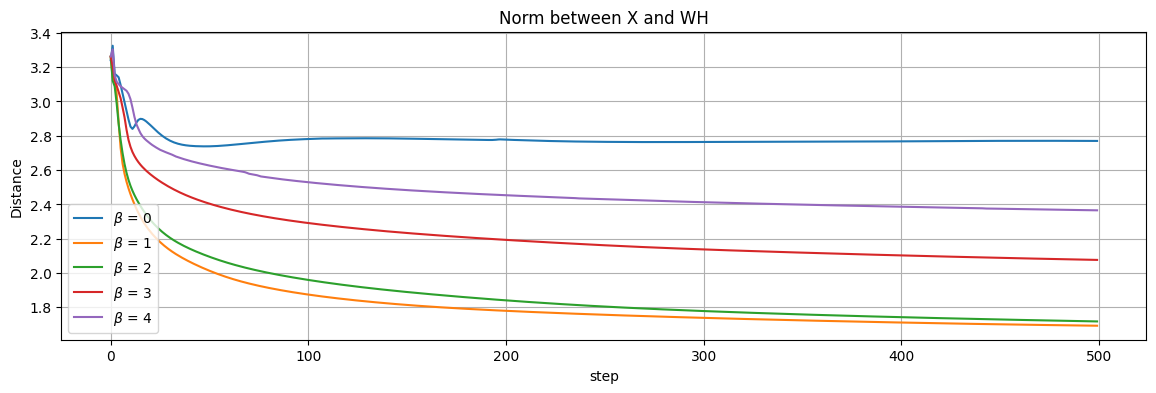

In [51]:
# Plotting the results, we will plot the LOG of the losses
plt.figure(figsize=(14, 4))
plt.grid()
plt.title("Norm between X and WH")
plt.plot(np.log10(norms_beta0), label=r"$\beta$ = 0")
plt.plot(np.log10(norms_beta1), label=r"$\beta$ = 1")
plt.plot(np.log10(norms_beta2), label=r"$\beta$ = 2")
plt.plot(np.log10(norms_beta3), label=r"$\beta$ = 3")
plt.plot(np.log10(norms_beta4), label=r"$\beta$ = 4")
plt.xlabel("step")
plt.ylabel("Distance")
plt.legend()
plt.show()

As we can see, $\beta = 0$ gives us bad results compared to the other divergence values. Moreover, increasing $\beta$ more than $2$ also is not optimal for this gradient descent problem. It seems that an appropriate value of $\beta$ would be one of either $1$ or $2$.

For the rest of the TP, we shall keep a value of $\beta = 2$.

Let us see the influence of the variable $K$, the one determining the matrixes sizes, on the loss. We will varry it from some values from $10$ to $500$.

In [52]:
# beta = 0
W_beta_K_10, H_beta_K_10, norms_beta_K_10 = MUR(X, 10, beta=2, number_iter= 500)
# beta = 1
W_beta_K_100, H_beta_K_100, norms_beta_K_100 = MUR(X, 100, beta=3, number_iter= 500)
# beta = 2
W_beta_K_200, H_beta_K_200, norms_beta_K_200 = MUR(X, 200, beta=2, number_iter= 500)
# beta = 3
W_beta_K_400, H_beta_K_400, norms_beta_K_400 = MUR(X, 400, beta=2, number_iter= 500)
# beta = 4
W_beta_K_500, H_beta_K_500, norms_beta_K_500 = MUR(X, 500, beta=2, number_iter= 500)

------------------------------------------------------------------------
The distance between the real matrix and W @ H for beta = 2 and K = 10 is: 1825.725314510234
The distance between the real matrix and W @ H for beta = 2 and K = 10 is: 446.8285153106489
The distance between the real matrix and W @ H for beta = 2 and K = 10 is: 434.6734039706059
The distance between the real matrix and W @ H for beta = 2 and K = 10 is: 429.81361355342005
The distance between the real matrix and W @ H for beta = 2 and K = 10 is: 377.2568832077279
The distance between the real matrix and W @ H for beta = 2 and K = 10 is: 354.0103086110562
The distance between the real matrix and W @ H for beta = 2 and K = 10 is: 293.14327347898615
The distance between the real matrix and W @ H for beta = 2 and K = 10 is: 290.4183064253814
The distance between the real matrix and W @ H for beta = 2 and K = 10 is: 289.1184674379167
The distance between the real matrix and W @ H for beta = 2 and K = 10 is: 288.082485154

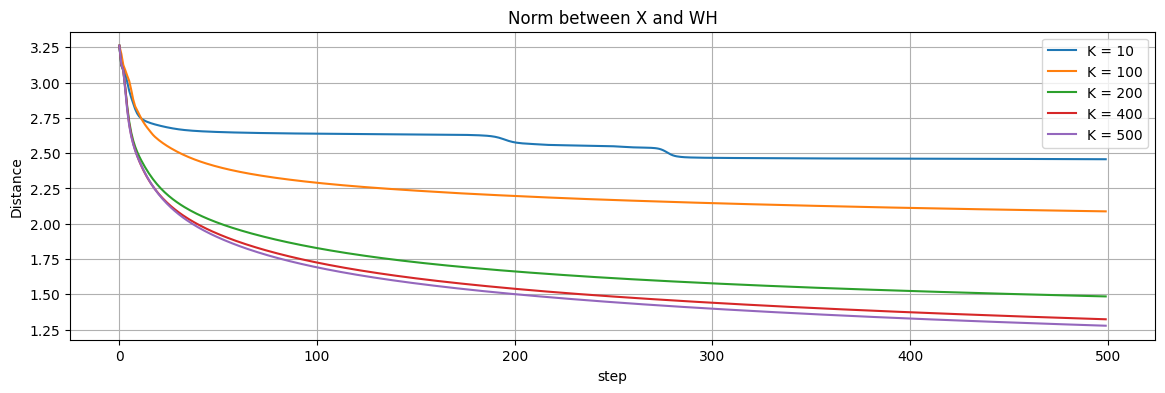

In [56]:
# Plotting the results, we will plot the LOG of the losses
plt.figure(figsize=(14, 4))
plt.grid()
plt.title("Norm between X and WH")
plt.plot(np.log10(norms_beta_K_10), label=r"K = 10")
plt.plot(np.log10(norms_beta_K_100), label=r"K = 100")
plt.plot(np.log10(norms_beta_K_200), label=r"K = 200")
plt.plot(np.log10(norms_beta_K_400), label=r"K = 400")
plt.plot(np.log10(norms_beta_K_500), label=r"K = 500")
plt.xlabel("step")
plt.ylabel("Distance")
plt.legend()
plt.show()

We can see that increasing the value of $K$ decreases the loss significantly, which makes sense since we get more values in our matrixes and more parameters to tune and modify, unlike a smaller matrix.

We shall keep the $K$ value at $500$ for the rest of the exercise.

Let us reconstruct the original signal with the optimal values we have found.

In [57]:
W_optim, H_optim, norms_optim = MUR(X, 500, beta=2, number_iter= 500)

------------------------------------------------------------------------
The distance between the real matrix and W @ H for beta = 2 and K = 500 is: 1825.6901200852337
The distance between the real matrix and W @ H for beta = 2 and K = 500 is: 79.45731124369168
The distance between the real matrix and W @ H for beta = 2 and K = 500 is: 48.72523771607004
The distance between the real matrix and W @ H for beta = 2 and K = 500 is: 37.100976938043566
The distance between the real matrix and W @ H for beta = 2 and K = 500 is: 30.904605604288214
The distance between the real matrix and W @ H for beta = 2 and K = 500 is: 26.999222135812147
The distance between the real matrix and W @ H for beta = 2 and K = 500 is: 24.251784827288812
The distance between the real matrix and W @ H for beta = 2 and K = 500 is: 22.18952260949033
The distance between the real matrix and W @ H for beta = 2 and K = 500 is: 20.562707178602
The distance between the real matrix and W @ H for beta = 2 and K = 500 is: 19

Let us replay the reconstructed signal using NMF and the original signal.

In [58]:
X_reconstruct = W_optim @ H_optim

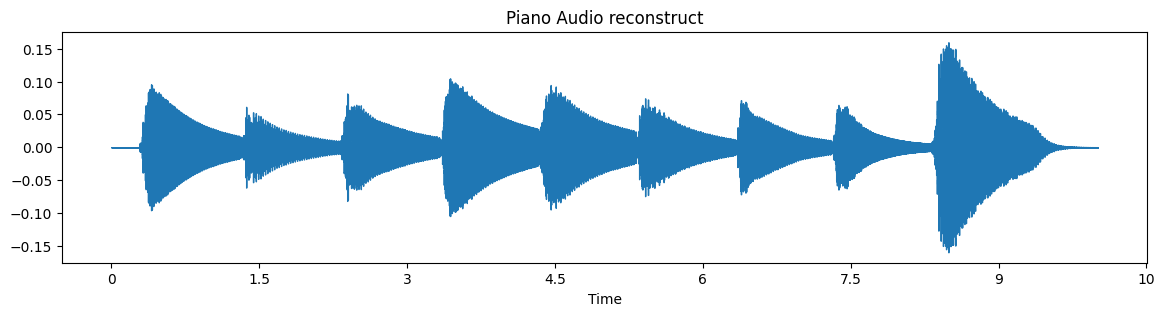

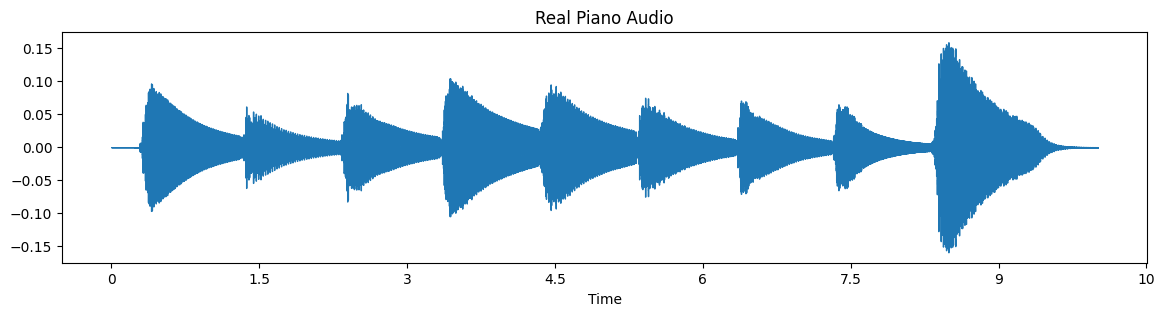

In [73]:
# reconstructed signal
signal_NMF = librosa.istft(X_reconstruct)
signal_X_abs = librosa.istft(X)

#Visualize the reconstructed waveform
plt.figure(figsize=(14, 3))
librosa.display.waveshow(signal_NMF, sr=sr, label="Piano Audio reconstruct")
plt.title("Piano Audio reconstruct")
plt.show()

#Visualize the ABS of the real waveform
plt.figure(figsize=(14, 3))
librosa.display.waveshow(signal_X_abs, sr=sr, label="Piano Audio reconstruct")
plt.title("Real Piano Audio")
plt.show()

The waveform perfectly matches the real one. However, we are plotting here the module of the signal, which explains the weird waveform compared to the previous ones.

Let us listen to the waveforms and compare.

In [ ]:
# Reconstructed Signal sound
ipd.Audio(signal_NMF, rate=sr)

In [78]:
# Original module of Signal sound
ipd.Audio(signal_X_abs, rate=sr)

Both sounds match... However, this does not sound good, since we are listening to the module of the STFT of the original signal.

### <ins style = "color : orange">Going a bit further...</ins>

The followinng part is an independant implmentatation of an NMF Algorithm but for complex matrixes. This will allow us to hear a reconstructed sound that matches the original one, without having to only use the posive parts of the matrix.

We know that the STFT of our $X$ signal, denoted by $X_{\text{stft}}$, can be decomposed into a real and an imaginary part, i.e:

$$X_{\text{stft}} = \text{Real}(X_{\text{stft}}) + j \cdot \text{Im}(X_{\text{stft}}) $$


However, this does not garentee us the positivity of the Real and imaginary parts of the matrix. To solve this, we can decompose a matrix into a positive and a negative part, i.e:

$$\text{Real}(X_{\text{stft}}) = \text{Real}(X_{\text{stft}})^{+} - \text{Real}(X_{\text{stft}})^{-}$$
$$\text{Im}(X_{\text{stft}}) = \text{Im}(X_{\text{stft}})^{+} - \text{Im}(X_{\text{stft}})^{-}$$

Thus:

$$X_{\text{stft}} = \text{Real}(X_{\text{stft}})^{+} - \text{Real}(X_{\text{stft}})^{-} + j \cdot (\text{Im}(X_{\text{stft}})^{+} - \text{Im}(X_{\text{stft}})^{-}) $$

$$X_{\text{stft}} = \text{Real}(X_{\text{stft}})^{+} + j \cdot (\text{Im}(X_{\text{stft}})^{+} - (\text{Real}(X_{\text{stft}})^{-} + j \cdot \text{Im}(X_{\text{stft}})^{-})) $$


Let us for instance take the $\texttt{positive}$ part of the $X_{\text{stft}}$: $\text{Real}(X_{\text{stft}})^{+} + j \cdot (\text{Im}(X_{\text{stft}})^{+}$,

we get: 

$$\text{Real}(X_{\text{stft}})^{+} + j \cdot (\text{Im}(X_{\text{stft}})^{+} = W_{1}H_{1} + j \cdot W_{2}H_{2} = [W_1 + j W_2][H_1 + H_2]^\top$$

We apply the same procedureto the negative part $\text{Real}(X_{\text{stft}})^{-} + j \cdot \text{Im}(X_{\text{stft}})^{-})$, which gives us:

$$\text{Real}(X_{\text{stft}})^{-} + j \cdot (\text{Im}(X_{\text{stft}})^{-} = W'_{1}H'_{1} + j \cdot W'_{2}H'_{2} = [W'_1 + j W'_2][H'_1 + H'_2]^\top$$


Finally, we conclude:

$$X_{\text{stft}} = [W_1, j W_2, W'_1, j W'_2] [H_1, H_2, -H'_1, -H'_2]^\top$$


Let us apply this conclusion to the original matrix using the previously defined functions.

In [79]:
# Getting real and imaginary parts
X_real = np.real(Xstft)
X_imag = np.imag(Xstft)

# Getting Positive and Negative parts of both real and imaginary parts
X_real_pos = np.maximum(0, X_real)
X_real_neg = np.maximum(0, -X_real)

X_imag_pos = np.maximum(0, X_imag)
X_imag_neg = np.maximum(0, -X_imag)

In [105]:
# MUR on all the previously collected positive matrixes
W_real_pos, H_real_pos, _ = MUR(X_real_pos, 500, beta=2, number_iter= 500)
W_real_neg, H_real_neg, _ = MUR(X_real_neg, 500, beta=2, number_iter= 500)

W_image_pos, H_image_pos, _ = MUR(X_imag_pos, 500, beta=2, number_iter= 500)
W_imag_neg, H_imag_neg, _ = MUR(X_imag_neg, 500, beta=2, number_iter= 500)

------------------------------------------------------------------------
The distance between the real matrix and W @ H for beta = 2 and K = 500 is: 924.48374793655
The distance between the real matrix and W @ H for beta = 2 and K = 500 is: 64.32626593328962
The distance between the real matrix and W @ H for beta = 2 and K = 500 is: 42.44697048763656
The distance between the real matrix and W @ H for beta = 2 and K = 500 is: 34.30504769446963
The distance between the real matrix and W @ H for beta = 2 and K = 500 is: 29.77491548396176
The distance between the real matrix and W @ H for beta = 2 and K = 500 is: 27.03189386836769
The distance between the real matrix and W @ H for beta = 2 and K = 500 is: 24.966917036324546
The distance between the real matrix and W @ H for beta = 2 and K = 500 is: 23.546462884165926
The distance between the real matrix and W @ H for beta = 2 and K = 500 is: 22.40458386158986
The distance between the real matrix and W @ H for beta = 2 and K = 500 is: 21.54

In [115]:
# Here we concatenate all the matrixes into a single one, giving us the previously concluded matrix product

W_concat = np.column_stack(
    [W_real_pos, 1j * W_image_pos, W_real_neg, 1j * W_imag_neg]
)


H_concat = np.vstack(
    [H_real_pos, H_image_pos, - H_real_neg, - H_imag_neg]
)
# Here we get the reconstructed STFT matrix

X_stft_reconstructed = W_concat @ H_concat

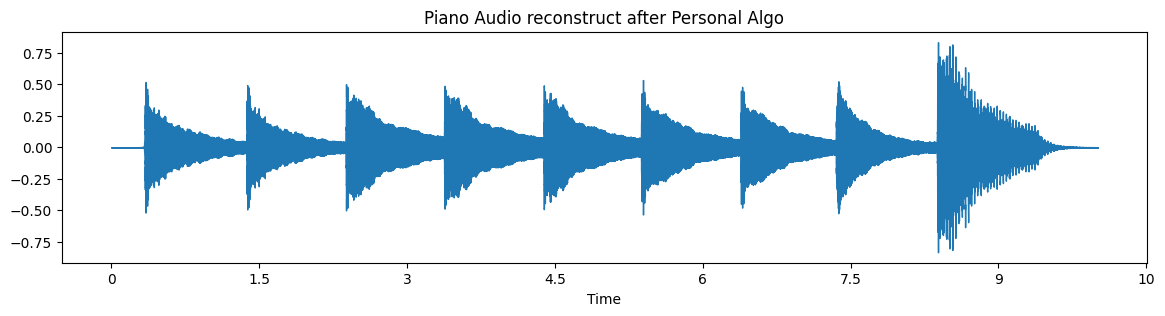

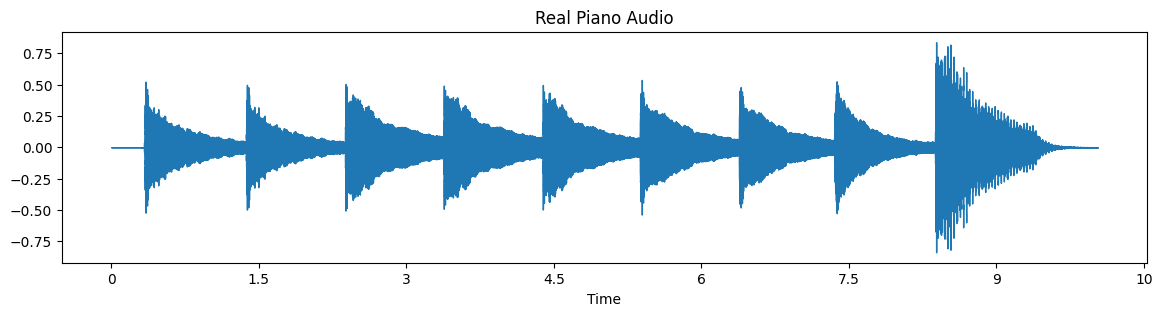

In [122]:
# Signal reconstruction
X_stft_reconst_signal = librosa.istft(X_stft_reconstructed)

#Visualize the reconstructed waveform
plt.figure(figsize=(14, 3))
librosa.display.waveshow(X_stft_reconst_signal, sr=sr, label="Piano Audio reconstruct")
plt.title("Piano Audio reconstruct after Personal Algo")
plt.show()

#Visualize the ABS of the real waveform
plt.figure(figsize=(14, 3))
librosa.display.waveshow(y, sr=sr, label="Piano Audio reconstruct")
plt.title("Real Piano Audio")
plt.show()

Nice! We get a perfect match with out original singal. What about the sound? How good is it ?

In [ ]:
# Correct reconstruction
ipd.Audio(X_stft_reconst_signal, rate=sr)

In [127]:
# Original Signal
ipd.Audio(y, rate=sr)

Perfect, we have found a way to Factorize a complex signal into Two complex matrixes. We were also able to reconstruct the signal and get a  satisfying sound, resembling the original one. This extension of the $\texttt{NMF}$ algorithm is a start into the topix of $\text{Complex Matrix Factorization}$. 